In [14]:
'''
This is the first notebook used in the analysis of the data. It is used to explore the data and to get a better understanding of the data. It is also used to create the dataframes that are used in the other notebooks.
We first do Exploratory Data Analysis (EDA) through word frequency analysis (histograms, barplots and stopwords)
'''

import pandas as pd
import numpy as np
from collections import Counter,defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

### Word frequency analysis

In [4]:
df = pd.read_csv("ExportedTransactions.csv")

<AxesSubplot: >

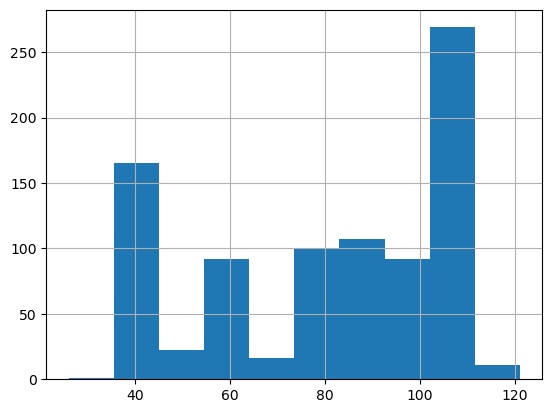

In [5]:
df['Description'].str.len().hist()

1. Descriptions range from 40-120 characters
2. Maximum count : 40, 70 - 110 characters

In [6]:
def plot_word_number_histogram(text):
    text.str.split().map(lambda x: len(x)).hist()

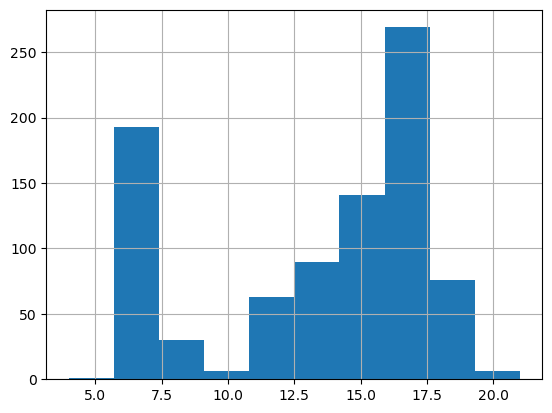

In [7]:
plot_word_number_histogram(df['Description'])

1. Word count per sentence ranges from 6-19 words approx
2. Majorly distributed : 11 - 18 words

<AxesSubplot: >

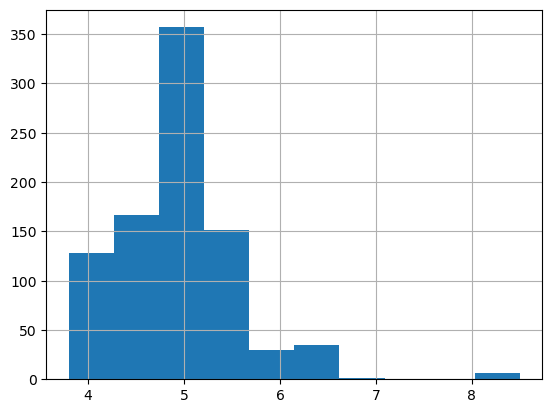

In [8]:
# word count on avg
df['Description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

4-7 words in each description

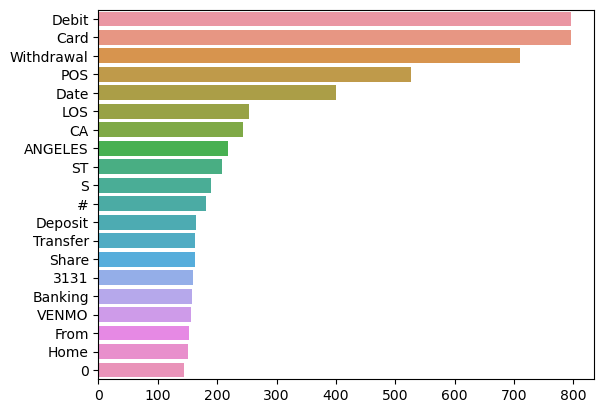

In [9]:
# Make barplot of top 20 words using seaborn
def plot_top_20_words(text):
    top_20 = Counter(" ".join(text).split()).most_common(20)
    x,y = zip(*top_20)
    sns.barplot(x=list(y),y=list(x))
plot_top_20_words(df['Description'])

Has a combination of stopwords and words that are not required for the model

In [12]:
# count stop words in each description

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)


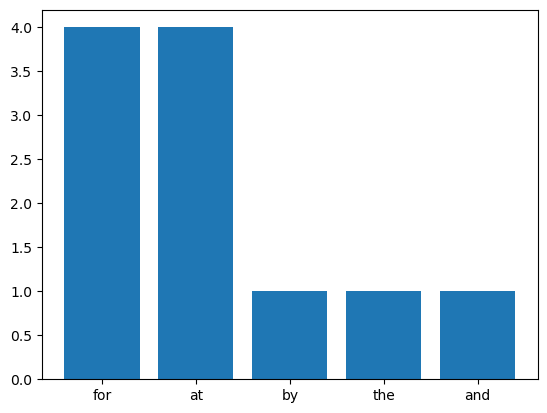

In [13]:
plot_top_stopwords_barchart(df['Description'])

There are just 5 kind of stopwords, so we will remove them after EDA

# References 
https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools